In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
dataset=pd.read_csv('Social_Network_Ads.csv');
x=dataset.iloc[:,[2,3]]
y=dataset.iloc[:,4]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train);
x_test=sc.fit_transform(x_test);

In [34]:
from sklearn.svm import SVC
sv=SVC(kernel='rbf',random_state=10,gamma= 0.23 ,C=1)
sv.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.23, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [35]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=sv,X=x_train,y=y_train,cv=10)
acc.mean()

0.8991509084167595

In [36]:
from sklearn.model_selection import GridSearchCV
para=[{'C':[1,10,100],'kernel':['linear']},
        {'C':[1,5,8,10,90,100,130],'kernel':['rbf','poly','sigmoid'],'gamma':[0.2,0.1,0.05,0.25,0.23]},]
gs=GridSearchCV(estimator=sv,param_grid=para,scoring='accuracy',cv=10,n_jobs=-1)
gs=gs.fit(x_train,y_train)
gs.best_score_

C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9066666666666666

In [37]:
gs.best_params_

{'C': 5, 'gamma': 0.23, 'kernel': 'rbf'}

In [38]:
yp=sv.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yp)
cm

array([[55,  5],
       [ 5, 35]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


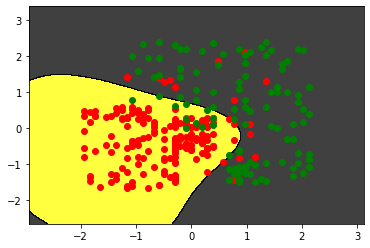

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, sv.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    